# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.shape

(81, 4)

In [5]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [6]:
df["Kyphosis"].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# EDA

In [7]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


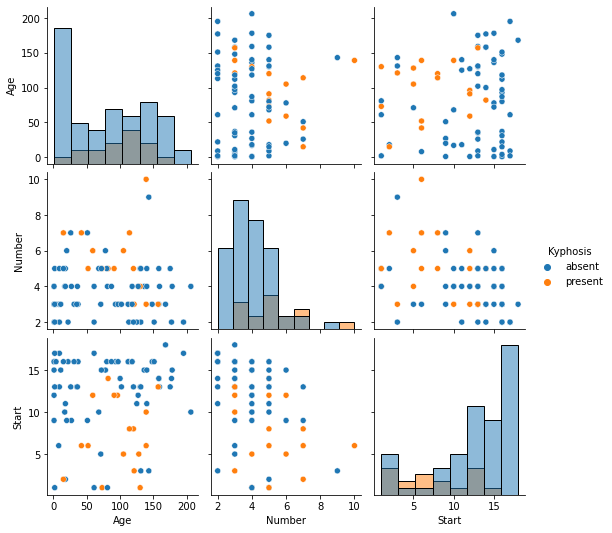

In [8]:
sns.pairplot(df, hue="Kyphosis", diag_kind="hist")

# Machine Learning

### Splitting the data

In [9]:
X = df[df.columns[1:]]
y = df["Kyphosis"]

In [10]:
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [11]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=2)

In [14]:
y_train.value_counts()

absent     43
present    11
Name: Kyphosis, dtype: int64

### Applying Decision Tree Algorithm

In [15]:
from sklearn import tree

In [26]:
dtm = tree.DecisionTreeClassifier()

In [27]:
dtm.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dtm.predict(X_test)

### Model Evaluation

In [29]:
dtm.score(X_train, y_train)

1.0

In [30]:
dtm.score(X_test, y_test)

0.8148148148148148

In [31]:
from sklearn import metrics

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=["absent", "present"])
cm

array([[19,  2],
       [ 3,  3]], dtype=int64)

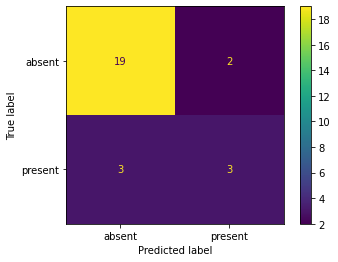

In [33]:
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=["absent", "present"])
cm_display.plot()

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.60      0.50      0.55         6

    accuracy                           0.81        27
   macro avg       0.73      0.70      0.71        27
weighted avg       0.81      0.81      0.81        27



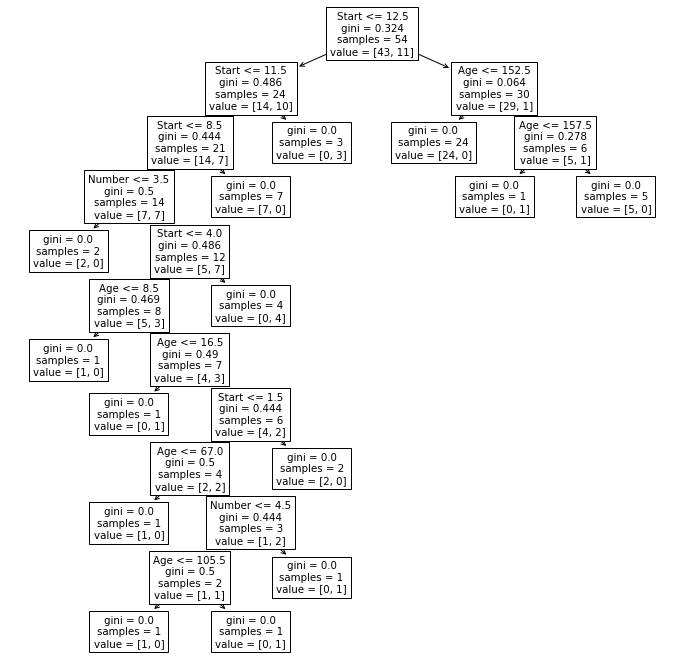

In [36]:
plt.figure(figsize=(12, 12))
tree.plot_tree(dtm, feature_names=X.columns);